In [4]:
!pip install fastai
!pip install fastinference -y
!pip install fastinference[interp]


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [1]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

In [2]:
df2 = pd.read_csv('./dataset2/SARS-CoV-2_2349_50up.csv')

In [3]:
columnsNames2 = df2.columns.values
columnsNames2 = [i+'_DNA' for i in columnsNames2]
df2.columns=columnsNames2
df2.rename(columns={'lineage_DNA':'lineage'})
df2

,lineage_DNA,1_DNA,2_DNA,3_DNA,4_DNA,5_DNA,6_DNA,7_DNA,8_DNA,9_DNA,...,29894_DNA,29895_DNA,29896_DNA,29897_DNA,29898_DNA,29899_DNA,29900_DNA,29901_DNA,29902_DNA,29903_DNA
0,B.1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,B.1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,B.1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,B.1,A,T,T,A,A,A,G,G,T,...,-,-,-,-,-,-,-,-,-,-
4,B.1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,B.1.2,-,-,-,-,-,A,G,G,T,...,A,A,A,A,A,A,A,A,A,A
2345,B.1.2,-,-,-,-,-,-,-,-,-,...,A,A,A,A,A,A,A,A,A,A
2346,B.1.2,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2347,B.1.2,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [7]:

splits = RandomSplitter()(range_of(df2))
cat_names = columnsNames2[1::]
procs = [Categorify, FillMissing]

y_names = 'lineage_DNA'

In [8]:
# to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
#                    y_names=y_names, splits=splits)

to = TabularPandas(df2, procs=procs, cat_names=cat_names, y_names=y_names, splits=splits)
to

      lineage_DNA  1_DNA  2_DNA  3_DNA  4_DNA  5_DNA  6_DNA  7_DNA  8_DNA  \
352             3      1      1      1      1      1      1      1      1   
925             3      1      1      1      1      1      1      1      1   
548             3      1      1      1      1      1      1      1      1   
1994            1      2      5      6      2      2      2      4      4   
2178            6      1      1      1      1      1      1      1      1   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2325            4      1      1      1      2      2      2      4      4   
337             3      1      1      1      1      1      1      1      1   
92              0      1      1      1      1      1      1      1      1   
230             0      2      5      6      2      2      2      4      4   
1080            3      1      1      1      1      1      1      1      1   

      9_DNA  ...  29894_DNA  29895_DNA  29896_DNA  29897_DNA  29898_DNA  \


In [9]:
dls = to.dataloaders()

In [13]:
learn = tabular_learner(dls, layers=[1024,256], metrics=accuracy)
# learn.summary()
learn.load('tmp')
learn.fit(1)
# learn.save('tmp')
# dl = learn.dls.test_dl(df2)

epoch,train_loss,valid_loss,accuracy,time
0,0.019800,0.064159,0.997868,02:01


Calculating Permutation Importance


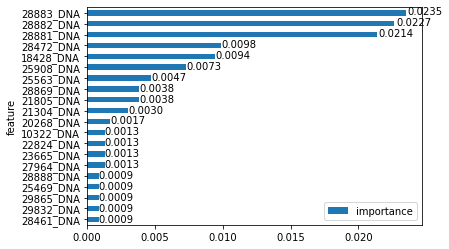

In [ ]:
# from fastinference.tabular.interpretation import *
fi = learn.feature_importance(df=df2)